In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use('seaborn')

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape) 

(500, 2)
(500, 2)


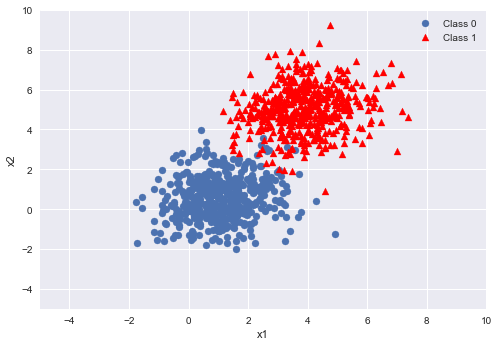

In [4]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [5]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 4.56454218  4.81928081  1.        ]
 [ 4.44317025  6.22098747  1.        ]
 [-0.01552316  2.378562    0.        ]
 [ 5.30118762  5.30423497  1.        ]
 [ 6.02006436  4.99588845  1.        ]
 [ 0.33798244 -0.46983401  0.        ]
 [-0.06416621  0.31941305  0.        ]
 [ 2.25882157  5.39381569  1.        ]
 [ 1.01224477 -1.07449531  0.        ]
 [ 0.21217898  0.48776604  0.        ]]


In [8]:
split = int(0.8*data.shape[0])

In [9]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [10]:
#data normalisation 
x_mean=X_train.mean(axis=0)

In [11]:
x_mean

array([2.47662026, 2.83153501])

In [12]:
x_std=X_train.std(axis=0)

In [13]:
x_std

array([1.76348467, 2.44301797])

In [14]:
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std

In [15]:
 def sigmoid(x):
        return 1.0/(1.0+np.exp(-x))

In [16]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [17]:
def error(X,y,theta):
    hi= hypothesis(X,theta)
    e= -1*np.mean((y*np.log(hi)+(1-y)*np.log(1-hi)))
    return e   

In [26]:
def gradient(X,y,theta):
    hi=hypothesis(X,theta)
    grad= np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m

In [27]:
def gradient_descent(X,y,lr=0.1,max_itr=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    
    error_list=[]
    
    for i in range(max_itr):
        err=error(X,y,theta)
        error_list.append(err)
        grad=gradient(X,y,theta)
        
        theta=theta+lr*grad
    
    return (theta,error_list)

In [28]:
ones=np.ones((X_train.shape[0],1))
X_New_Train=np.hstack((ones,X_train))

In [29]:
theta,error_list=gradient_descent(X_New_Train,Y_train)

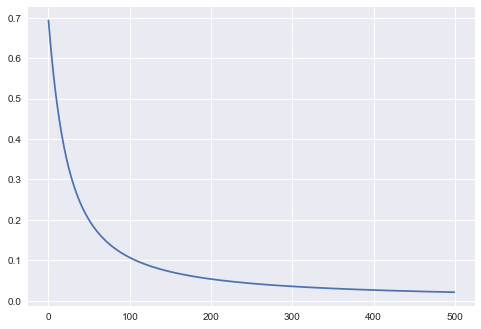

In [30]:
plt.plot(error_list)
plt.show()

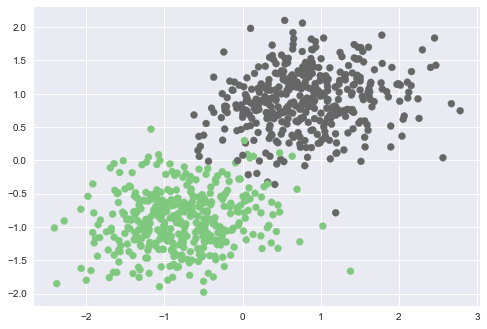

In [32]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()